In [1]:
# Required Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
#load the dataset 
df = pd.read_csv(r'C:\Users\user\Downloads\mumbai_house_price.csv')


In [3]:
#First 5 rows of data
print("First 5 rows:")
display(df.head())

First 5 rows:


,area_sqft,bedrooms,bathrooms,year_built,location,floor_number,has_parking,has_gym,price
0,1124.0,1.0,3.0,1999.0,Vikhroli,11,0,0,23872759.0
1,965.0,2.0,2.0,2000.0,Andheri,12,0,0,25062372.0
2,NaN,4.0,2.0,2000.0,Dadar,12,1,0,32366719.0
3,1381.0,2.0,2.0,2010.0,Bandra,3,1,1,NaN
4,941.0,3.0,1.0,2010.0,Bandra,7,0,1,27471907.0


In [4]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_sqft     1116 non-null   float64
 1   bedrooms      1116 non-null   float64
 2   bathrooms     1116 non-null   float64
 3   year_built    1116 non-null   float64
 4   location      1200 non-null   object 
 5   floor_number  1200 non-null   int64  
 6   has_parking   1200 non-null   int64  
 7   has_gym       1200 non-null   int64  
 8   price         1116 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 84.5+ KB
None


In [5]:
print("Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
area_sqft       84
bedrooms        84
bathrooms       84
year_built      84
location         0
floor_number     0
has_parking      0
has_gym          0
price           84
dtype: int64


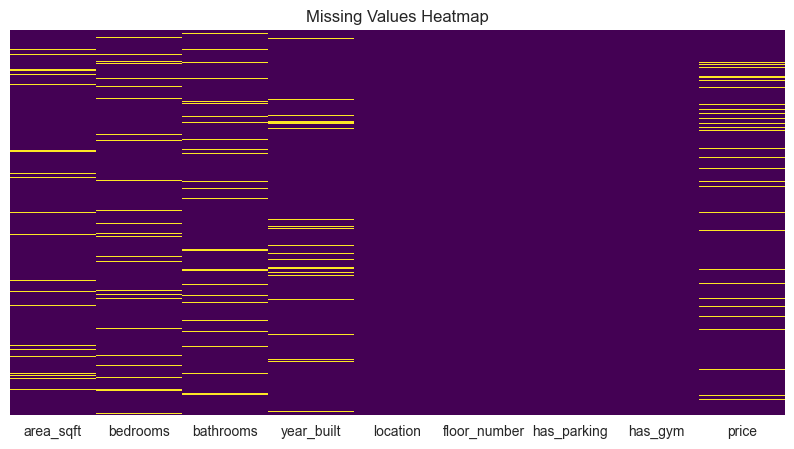

In [6]:
#  Visualize missing data heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
# Fill missing values
# Numerical columns: fill with median
num_cols = ['area_sqft', 'bedrooms', 'bathrooms', 'year_built', 'price']
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [8]:
# Confirm no missing values remain
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
area_sqft       0
bedrooms        0
bathrooms       0
year_built      0
location        0
floor_number    0
has_parking     0
has_gym         0
price           0
dtype: int64


In [9]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,area_sqft,bedrooms,bathrooms,year_built,floor_number,has_parking,has_gym,price
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03
mean,1008.369167,2.091667,1.905833,2006.204167,10.541667,0.615000,0.301667,2.545346e+07
std,237.400933,0.804448,0.682413,8.910592,5.690218,0.486798,0.459173,4.604595e+06
min,190.000000,1.000000,1.000000,1990.000000,1.000000,0.000000,0.000000,1.046211e+07
25%,857.000000,2.000000,1.000000,1999.000000,6.000000,0.000000,0.000000,2.253033e+07
50%,1013.500000,2.000000,2.000000,2006.000000,11.000000,1.000000,0.000000,2.524067e+07
75%,1155.250000,3.000000,2.000000,2013.000000,15.000000,1.000000,1.000000,2.842388e+07
max,1963.000000,4.000000,3.000000,2022.000000,20.000000,1.000000,1.000000,4.335005e+07


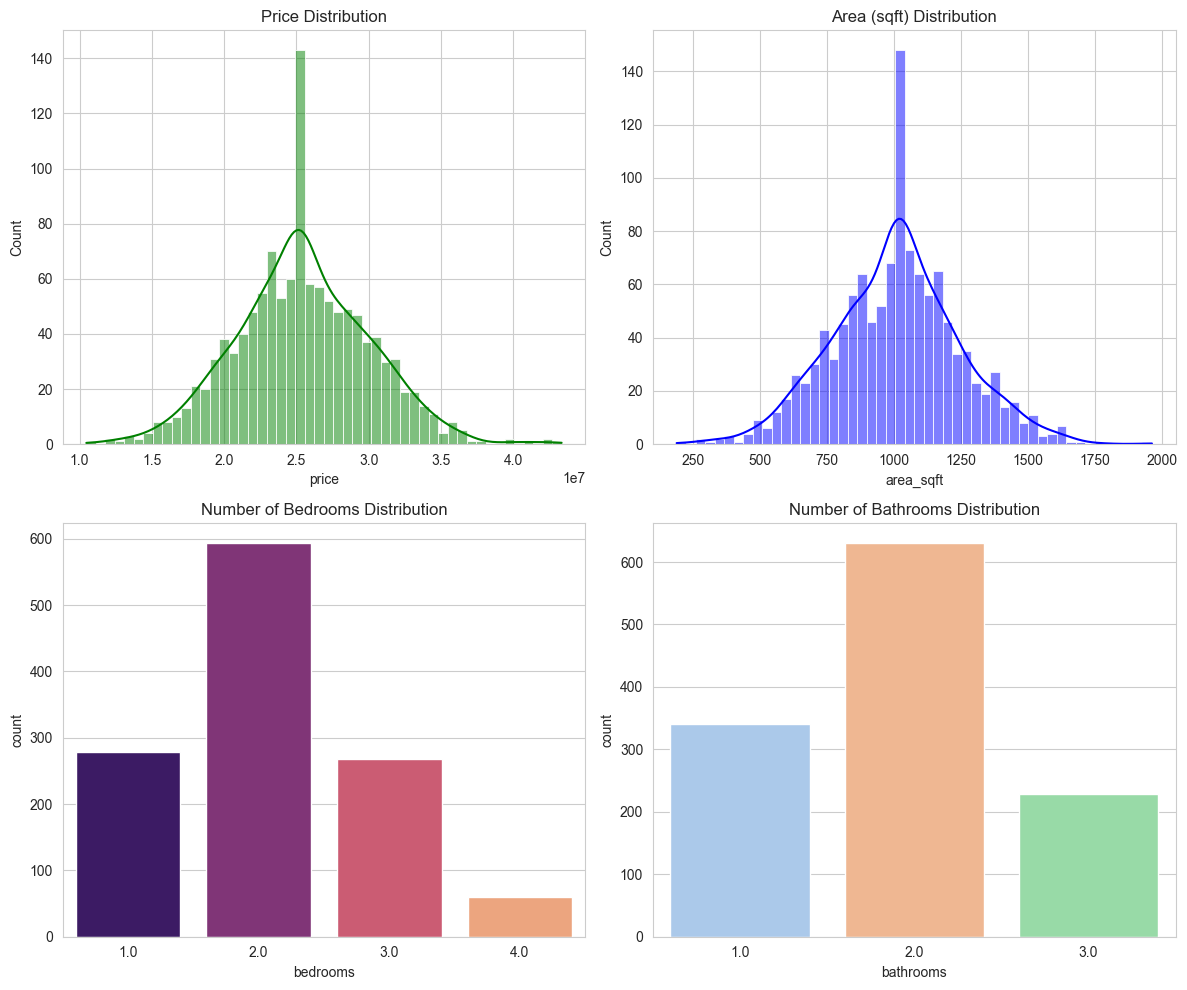

In [10]:
#  Distribution plots for key numerical variables
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Price Distribution')

plt.subplot(2,2,2)
sns.histplot(df['area_sqft'], bins=50, kde=True, color='blue')
plt.title('Area (sqft) Distribution')

plt.subplot(2,2,3)
sns.countplot(x='bedrooms', data=df, palette='magma')
plt.title('Number of Bedrooms Distribution')

plt.subplot(2,2,4)
sns.countplot(x='bathrooms', data=df, palette='pastel')
plt.title('Number of Bathrooms Distribution')

plt.tight_layout()
plt.show()

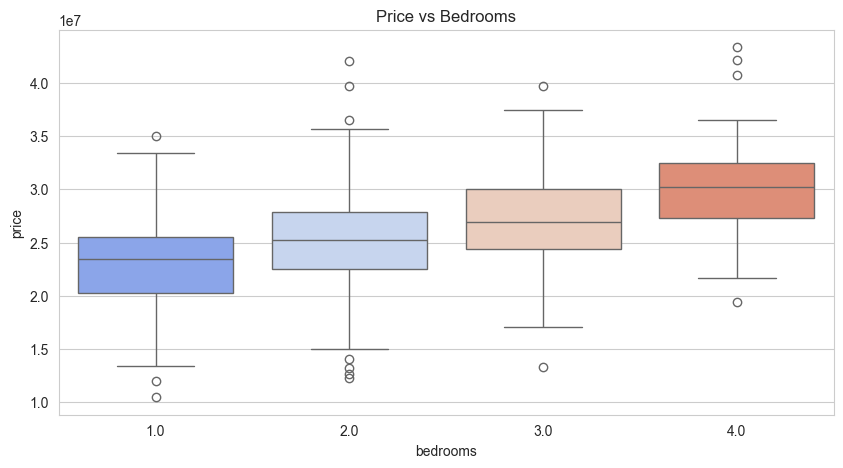

In [11]:
# Step 7: Boxplots to check outliers & distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df, palette='coolwarm')
plt.title('Price vs Bedrooms')
plt.show()

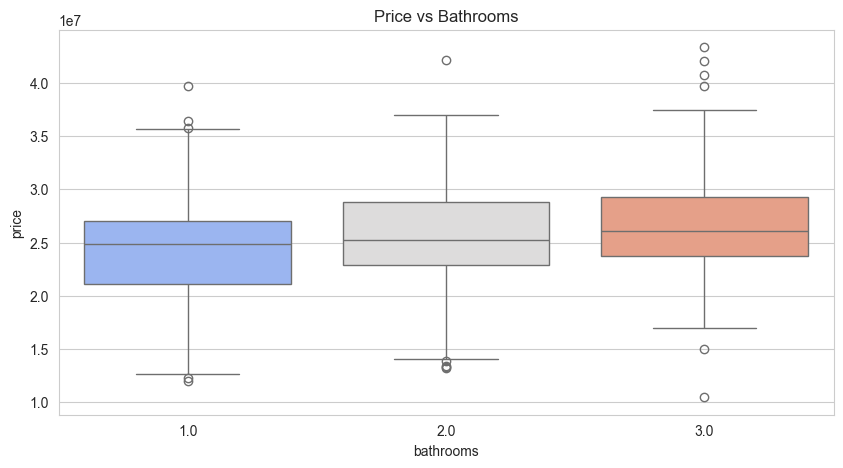

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bathrooms', y='price', data=df, palette='coolwarm')
plt.title('Price vs Bathrooms')
plt.show()

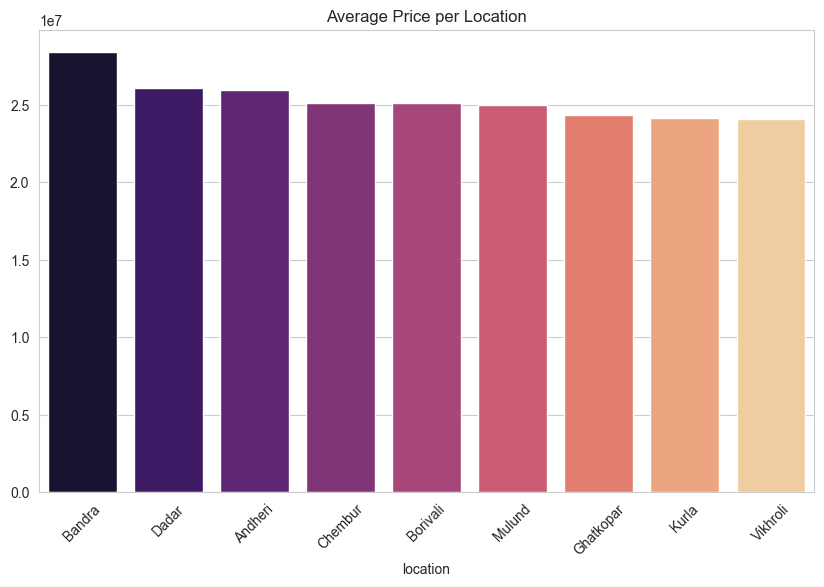

In [13]:
# Step 8: Barplot average price per location
plt.figure(figsize=(10,6))
loc_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
sns.barplot(x=loc_price.index, y=loc_price.values, palette='magma')
plt.title('Average Price per Location')
plt.xticks(rotation=45)
plt.show()

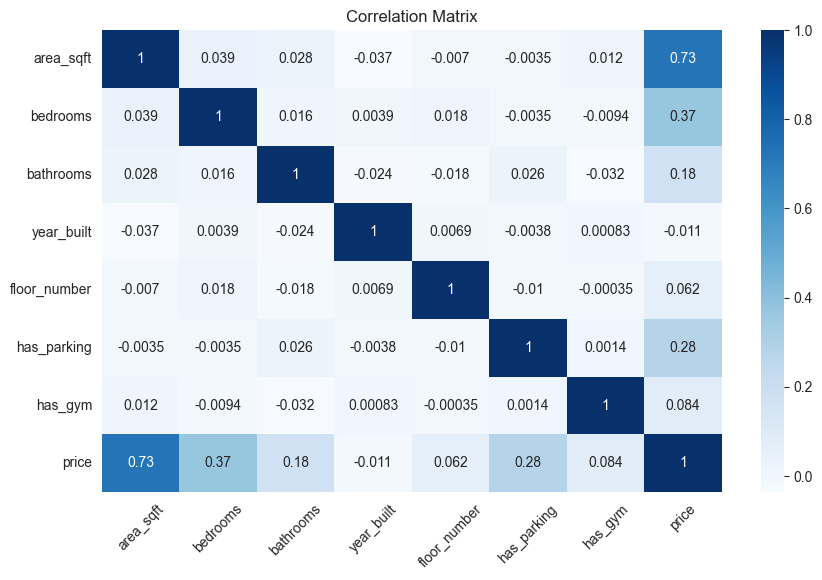

In [14]:

# Step 9: Correlation heatmap (numerical features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

In [15]:
#  Encode categorical variable - location
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

In [16]:
#  Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [17]:
#  Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [19]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [20]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [21]:
# Step 14: Evaluate models

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}")
    print(f"{model_name} - R2 Score: {r2:.2f}")
    print('-'*30)

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')


Linear Regression - RMSE: 1918167.84
Linear Regression - R2 Score: 0.82
------------------------------
Random Forest - RMSE: 2191662.88
Random Forest - R2 Score: 0.77
------------------------------
Lasso Regression - RMSE: 1918167.65
Lasso Regression - R2 Score: 0.82
------------------------------


In [22]:
# Predicting house price using best model (Lasso in this case)

# Picking one sample from test set
sample = X_test.iloc[0]

# Predict price
predicted_price = lasso.predict([sample])[0]

# Actual price
actual_price = y_test.iloc[0]

# Display results
print("🎯 Final House Price Prediction")
print("-" * 40)
print("📌 House Features Used for Prediction:")
display(sample.to_frame().T)

print("🏠 Predicted Price: ₹", round(predicted_price))
print("✅ Actual Price   : ₹", actual_price)



🎯 Final House Price Prediction
----------------------------------------
📌 House Features Used for Prediction:


,area_sqft,bedrooms,bathrooms,year_built,floor_number,has_parking,has_gym,location_Bandra,location_Borivali,location_Chembur,location_Dadar,location_Ghatkopar,location_Kurla,location_Mulund,location_Vikhroli
1178,753.0,1.0,2.0,1999.0,15,0,0,False,False,False,True,False,False,False,False


🏠 Predicted Price: ₹ 18421739
✅ Actual Price   : ₹ 17491197.0


In [23]:
#  Predict house price using all models

sample = X_test.iloc[0]
actual_price = y_test.iloc[0]

# ✅ Make sure model names match your training step
pred_lr = lr.predict([sample])[0]
pred_rf = rf.predict([sample])[0]
pred_lasso = lasso.predict([sample])[0]

# Show results
print("🎯 Final House Price Prediction")
print("-" * 40)
display(sample.to_frame().T)
print("✅ Actual Price: ₹", actual_price)
print("🔹 Linear Regression Prediction: ₹", round(pred_lr))
print("🔸 Random Forest Prediction    : ₹", round(pred_rf))
print("🔹 Lasso Regression Prediction  : ₹", round(pred_lasso))



🎯 Final House Price Prediction
----------------------------------------


,area_sqft,bedrooms,bathrooms,year_built,floor_number,has_parking,has_gym,location_Bandra,location_Borivali,location_Chembur,location_Dadar,location_Ghatkopar,location_Kurla,location_Mulund,location_Vikhroli
1178,753.0,1.0,2.0,1999.0,15,0,0,False,False,False,True,False,False,False,False


✅ Actual Price: ₹ 17491197.0
🔹 Linear Regression Prediction: ₹ 18421738
🔸 Random Forest Prediction    : ₹ 19222702
🔹 Lasso Regression Prediction  : ₹ 18421739


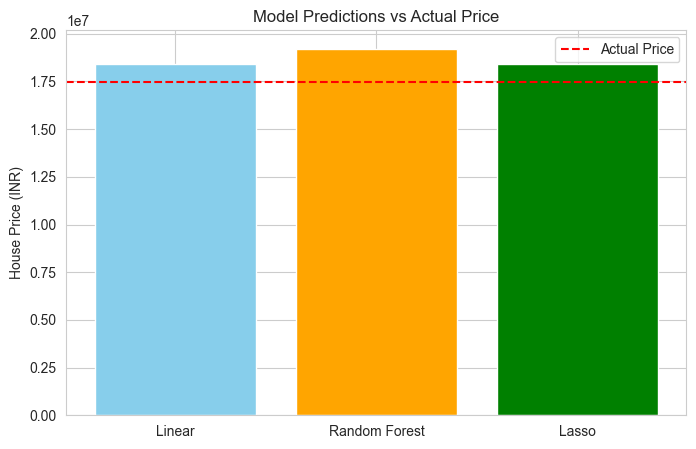

In [24]:
# 📊 Visual Comparison of Model Predictions vs Actual Price
# This bar chart shows how each model (Linear, Random Forest, Lasso)

import matplotlib.pyplot as plt

models = ['Linear', 'Random Forest', 'Lasso']
predictions = [pred_lr, pred_rf, pred_lasso]

plt.figure(figsize=(8,5))
plt.bar(models, predictions, color=['skyblue', 'orange', 'green'])
plt.axhline(y=actual_price, color='red', linestyle='--', label='Actual Price')
plt.title("Model Predictions vs Actual Price")
plt.ylabel("House Price (INR)")
plt.legend()
plt.show()


In [25]:
#Get feature importance from Random Forest
import pandas as pd

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)


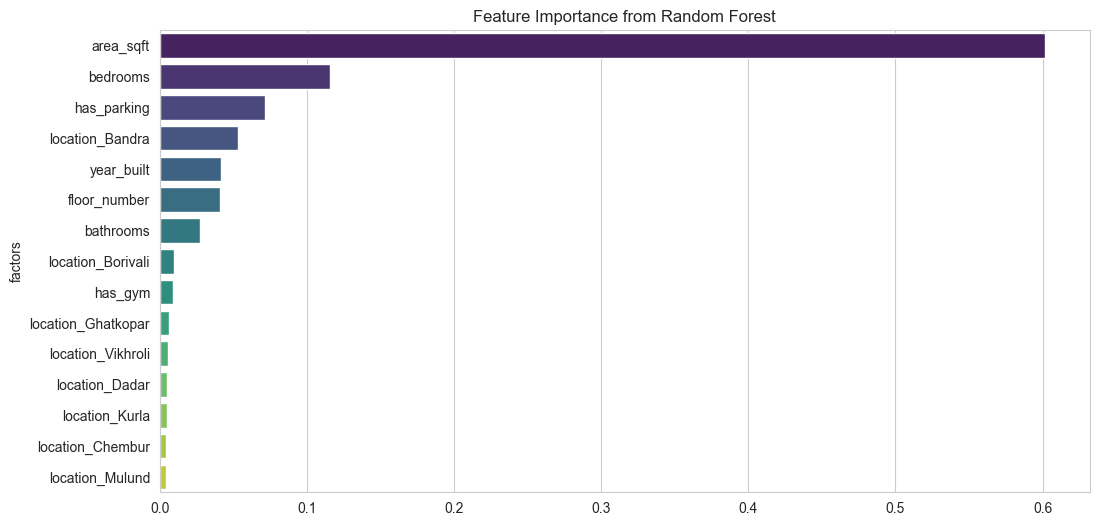

In [26]:
# 📌 Feature Importance Visualization using Random Forest
plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.ylabel("factors")
plt.show()


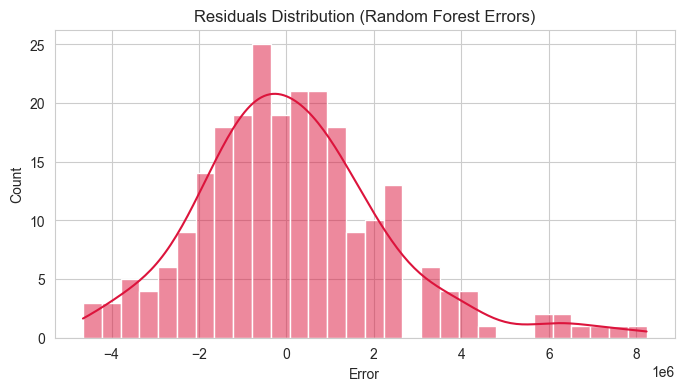

In [27]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True, color='crimson')
plt.title("Residuals Distribution (Random Forest Errors)")
plt.xlabel("Error")
plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error

# Final performance metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Final Random Forest Model Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")






Final Random Forest Model Performance:
RMSE: 2191662.88
MAE: 1637100.17
R2 Score: 0.77


## # Conclusion

- The Random Forest model performed well for predicting house prices, achieving an R² score of approximately 0.77.
- The residuals plot indicates that the prediction errors are approximately normally distributed around zero, suggesting that the model fits the data reasonably well.
- Linear Regression and Lasso Regression models showed slightly better accuracy (R² ~0.82), but Random Forest provides valuable insights through feature importance.
- Key features such as location, area, and number of bedrooms significantly impact house prices.
- For future improvements, collecting more data and incorporating additional relevant features could help increase model accuracy further.
- Overall, this project demonstrates a comprehensive approach to house price prediction using multiple regression models with clear data preprocessing, visualization, and evaluation steps.


In [29]:
# Example new house data (as per  features)
new_house = X_test.iloc[1].values.reshape(1, -1)

predicted_price = rf.predict(new_house)[0]
print(f"Predicted price for new house: ₹{round(predicted_price)}")


Predicted price for new house: ₹21893741


In [30]:
import joblib
joblib.dump(rf, 'mumbai_rf_model.pkl')


['mumbai_rf_model.pkl']

# 🔚 Final Thoughts

Thanks for reviewing my project! This notebook showcased a full machine learning pipeline:
- Cleaned and preprocessed real estate data for Mumbai
- Visualized trends and patterns using heatmaps, boxplots, and histograms
- Built and compared multiple models (Linear, Random Forest, Lasso)
- Predicted house prices and evaluated model performance using RMSE and R²
- Saved the model using `joblib` for future use

📌 **Skills Used:** Data Cleaning | EDA | Feature Engineering | Regression Models | Visualization | Model Deployment

📬 **Contact:** riyadew77@gmail.com
